<a href="https://colab.research.google.com/github/lsmanoel/CEM_4/blob/master/out_3d_compare_top_bottom_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## CSV from Github:

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [0]:
import numpy as np
import pandas as pd
from matplotlib.ticker import IndexFormatter

url_elc_plane_bottom_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20%20plane_bottom_24_MHz.csv'
url_elc_plane_bottom_500_KHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_bottom_500_KHz.csv'
url_elc_plane_top_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_24_MHz.csv'
url_elc_plane_top_500_KHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20plane_top_500_KHz.csv'
url_mag_plane_bottom_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_bottom_24_MHz.csv'
url_mag_plane_top_24_MHz = 'https://raw.githubusercontent.com/lsmanoel/CEM_4/master/13.06/placaL_medidas%20-%20mag_plane_top_24_MHz.csv'

columns_name = ['A','B','C','D','E','F','G','H','I','J','K','L','M']
rows_name = np.arange(1,14,1).tolist()
xticks_formatter = IndexFormatter(columns_name)
yticks_formatter = IndexFormatter(rows_name)

pd_elc_plane_bottom_24_MHz = pd.read_csv(url_elc_plane_bottom_24_MHz, names=columns_name)
pd_elc_plane_bottom_24_MHz = pd_elc_plane_bottom_24_MHz[pd_elc_plane_bottom_24_MHz.columns[::-1]]
pd_elc_plane_bottom_500_KHz = pd.read_csv(url_elc_plane_bottom_500_KHz, names=columns_name)
pd_elc_plane_bottom_500_KHz = pd_elc_plane_bottom_500_KHz[pd_elc_plane_bottom_500_KHz.columns[::-1]]
pd_mag_plane_bottom_24_MHz = pd.read_csv(url_mag_plane_bottom_24_MHz, names=columns_name)
pd_mag_plane_bottom_24_MHz = pd_mag_plane_bottom_24_MHz[pd_mag_plane_bottom_24_MHz.columns[::-1]]

pd_elc_plane_top_24_MHz = pd.read_csv(url_elc_plane_top_24_MHz, names=columns_name)
pd_elc_plane_top_500_KHz = pd.read_csv(url_elc_plane_top_500_KHz, names=columns_name)
pd_mag_plane_top_24_MHz = pd.read_csv(url_mag_plane_top_24_MHz, names=columns_name)

elc_plane_bottom_24_MHz = pd_elc_plane_bottom_24_MHz.values
elc_plane_bottom_500_KHz = pd_elc_plane_bottom_500_KHz.values
elc_plane_top_24_MHz = pd_elc_plane_top_24_MHz.values
elc_plane_top_500_KHz = pd_elc_plane_top_500_KHz.values
mag_plane_bottom_24_MHz = pd_mag_plane_bottom_24_MHz.values
mag_plane_top_24_MHz = pd_mag_plane_top_24_MHz.values

elc_plane_bottom_24_MHz = -elc_plane_bottom_24_MHz
elc_plane_bottom_500_KHz = -elc_plane_bottom_500_KHz
elc_plane_top_24_MHz = -elc_plane_top_24_MHz
elc_plane_top_500_KHz = -elc_plane_top_500_KHz
mag_plane_bottom_24_MHz = -mag_plane_bottom_24_MHz
mag_plane_top_24_MHz = -mag_plane_top_24_MHz


---
##  Plot 3d: Global Config

In [0]:
cube_range = (0, 13)

figure_size = (18,15)
plot_layout = (2, 2)
teta_view = 170
phi_view = 77

##  Plot 3d: Global Config - Elétrico

In [0]:
elc_global_scale = (10, -60)
elc_private_scale = ((
    np.max(np.array([*elc_plane_bottom_24_MHz,
                     *elc_plane_bottom_500_KHz,
                     *elc_plane_top_24_MHz,
                     *elc_plane_top_500_KHz])), 
    np.min(np.array([*elc_plane_bottom_24_MHz,
                     *elc_plane_bottom_500_KHz,
                     *elc_plane_top_24_MHz,
                     *elc_plane_top_500_KHz])))
)

elc_zLim = (elc_private_scale[1], elc_private_scale[0]) 

elc_cube_range = cube_range

elc_figure_size = figure_size
elc_plot_layout = plot_layout
elc_teta_view = teta_view
elc_phi_view = phi_view

##  Plot 3d: Global Config - Magnético

In [0]:
mag_global_scale = (10, -60)
mag_private_scale = ((
    np.max(np.array([*mag_plane_bottom_24_MHz,
                     *mag_plane_top_24_MHz])), 
    np.min(np.array([*mag_plane_bottom_24_MHz,
                     *mag_plane_top_24_MHz])))
)

mag_zLim = (mag_private_scale[1], mag_private_scale[0])

mag_cube_range = cube_range

mag_figure_size = figure_size
mag_plot_layout = plot_layout
mag_teta_view = 45
mag_phi_view = 75

---
## Interpolate Global Config

In [0]:
s = 600
ratio = 10
antialiased = True

elc_s = s
elc_ratio = ratio
elc_antialiased = antialiased

mag_s = 250
mag_ratio = ratio
mag_antialiased = antialiased

---
##  Plot 3d: Top - Bottom - 500 KHz -  24 MHz - Elétrico

In [0]:
Z_1 = elc_plane_top_500_KHz
Z_2 = elc_plane_bottom_500_KHz
Z_3 = elc_plane_top_24_MHz
Z_4 = elc_plane_bottom_24_MHz

/usr/local/lib/python3.6/dist-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: The required storage space exceeds the available storage space.
Probable causes: nxest or nyest too small or s is too small. (fp>s)
	kx,ky=3,3 nx,ny=12,12 m=169 fp=786.649702 s=600.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


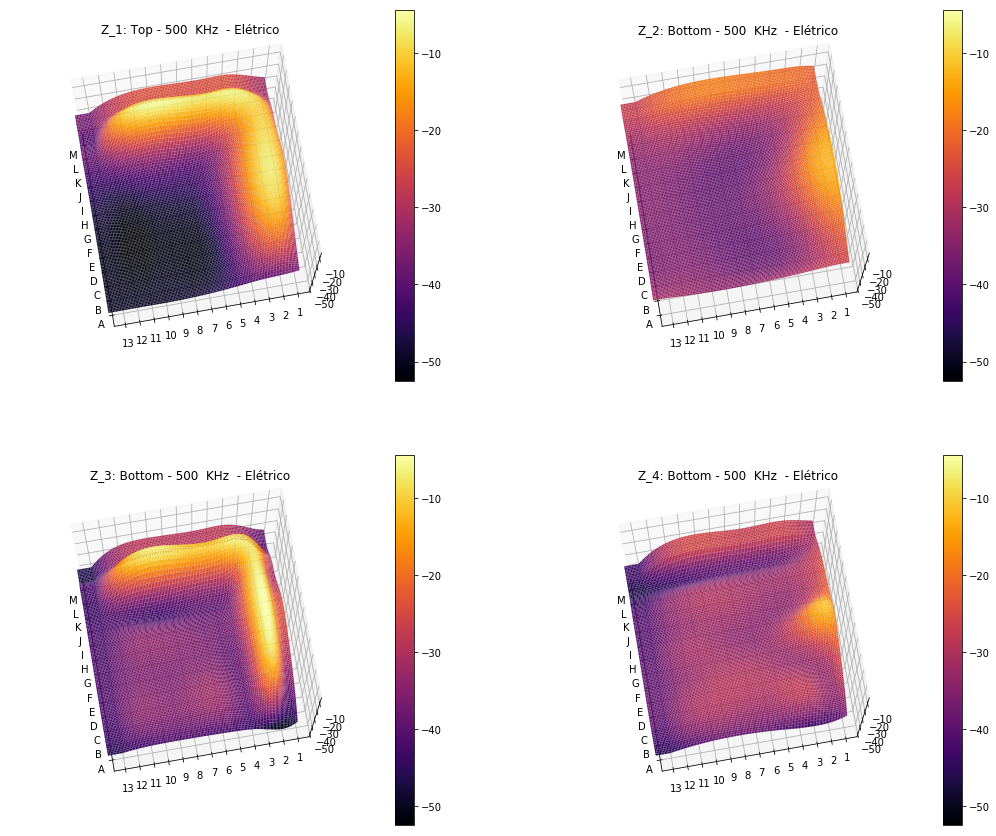

In [7]:
Z_1 = Z_1[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]
Z_2 = Z_2[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]
Z_3 = Z_3[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]
Z_4 = Z_4[elc_cube_range[0]:elc_cube_range[1], elc_cube_range[0]:elc_cube_range[1]]

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from scipy import interpolate

# ==============================================================================
fig = plt.figure(figsize=elc_figure_size)

# ==============================================================================
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 1, projection='3d')
ax.set_title('Z_1: Top - 500  KHz  - Elétrico')

X = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
Y = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z_1, s=elc_s)

X_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)
Y_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)

X_interp, Y_interp = np.mgrid[elc_cube_range[0]:elc_cube_range[1]:ratio*cube_range[1]*1j, elc_cube_range[0]:elc_cube_range[1]:elc_ratio*elc_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,cube_range[0]], Y_interp[cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=elc_antialiased,
                       vmax = elc_private_scale[0],
                       vmin = elc_private_scale[1])

fig.colorbar(surf, shrink=1, aspect=20)

ax.set_zlim(elc_zLim[0], elc_zLim[1])
ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.view_init(elc_phi_view, elc_teta_view)

# ==============================================================================
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 2, projection='3d')
ax.set_title('Z_2: Bottom - 500  KHz  - Elétrico')

X = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
Y = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z_2, s=elc_s)

X_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)
Y_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)

X_interp, Y_interp = np.mgrid[elc_cube_range[0]:elc_cube_range[1]:ratio*cube_range[1]*1j, elc_cube_range[0]:elc_cube_range[1]:elc_ratio*elc_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,cube_range[0]], Y_interp[cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=elc_antialiased,
                       vmax = elc_private_scale[0],
                       vmin = elc_private_scale[1])

fig.colorbar(surf, shrink=1, aspect=20)

ax.set_zlim(elc_zLim[0], elc_zLim[1])
ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.view_init(elc_phi_view, elc_teta_view)

# ==============================================================================
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 3, projection='3d')
ax.set_title('Z_3: Bottom - 500  KHz  - Elétrico')

X = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
Y = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z_3, s=elc_s)

X_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)
Y_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)

X_interp, Y_interp = np.mgrid[elc_cube_range[0]:elc_cube_range[1]:ratio*cube_range[1]*1j, elc_cube_range[0]:elc_cube_range[1]:elc_ratio*elc_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,cube_range[0]], Y_interp[cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=elc_antialiased,
                       vmax = elc_private_scale[0],
                       vmin = elc_private_scale[1])

fig.colorbar(surf, shrink=1, aspect=20)

ax.set_zlim(elc_zLim[0], elc_zLim[1])
ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.view_init(elc_phi_view, elc_teta_view)

# ==============================================================================
ax = fig.add_subplot(elc_plot_layout[0], elc_plot_layout[1], 4, projection='3d')
ax.set_title('Z_4: Bottom - 500  KHz  - Elétrico')

X = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
Y = np.arange(elc_cube_range[0], elc_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z_4, s=elc_s)

X_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)
Y_interp = np.arange(elc_cube_range[0], elc_cube_range[1], 1/elc_ratio)

X_interp, Y_interp = np.mgrid[elc_cube_range[0]:elc_cube_range[1]:ratio*cube_range[1]*1j, elc_cube_range[0]:elc_cube_range[1]:elc_ratio*elc_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,cube_range[0]], Y_interp[cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=elc_antialiased,
                       vmax = elc_private_scale[0],
                       vmin = elc_private_scale[1])

fig.colorbar(surf, shrink=1, aspect=20)

ax.set_zlim(elc_zLim[0], elc_zLim[1])
ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.view_init(elc_phi_view, elc_teta_view)

# ==============================================================================
plt.show()

---
##  Plot 3d: Top - Bottom - 24  MHz  - Magnético

In [0]:
Z_1 = mag_plane_top_24_MHz
Z_2 = mag_plane_bottom_24_MHz

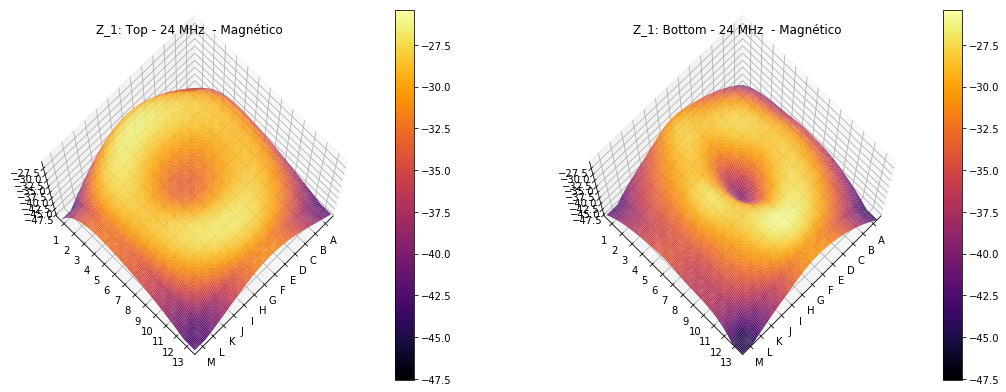

In [9]:
Z_1 = Z_1[mag_cube_range[0]:mag_cube_range[1], mag_cube_range[0]:mag_cube_range[1]]
Z_2 = Z_2[mag_cube_range[0]:mag_cube_range[1], mag_cube_range[0]:mag_cube_range[1]]

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from scipy import interpolate

# ==============================================================================
fig = plt.figure(figsize=mag_figure_size)

# ==============================================================================
ax = fig.add_subplot(mag_plot_layout[0], mag_plot_layout[1], 1, projection='3d')
ax.set_title('Z_1: Top - 24 MHz  - Magnético')

X = np.arange(mag_cube_range[0], mag_cube_range[1], 1)
Y = np.arange(mag_cube_range[0], mag_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z_1, s=mag_s)

X_interp = np.arange(mag_cube_range[0], mag_cube_range[1], 1/mag_ratio)
Y_interp = np.arange(mag_cube_range[0], mag_cube_range[1], 1/mag_ratio)

X_interp, Y_interp = np.mgrid[mag_cube_range[0]:mag_cube_range[1]:ratio*cube_range[1]*1j, mag_cube_range[0]:mag_cube_range[1]:mag_ratio*mag_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,cube_range[0]], Y_interp[cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=mag_antialiased,
                       vmax = mag_private_scale[0],
                       vmin = mag_private_scale[1])

fig.colorbar(surf, shrink=1, aspect=20)

ax.set_zlim(mag_zLim[0], mag_zLim[1])
ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.view_init(mag_phi_view, mag_teta_view)

# ==============================================================================
ax = fig.add_subplot(mag_plot_layout[0], mag_plot_layout[1], 2, projection='3d')
ax.set_title('Z_1: Bottom - 24 MHz  - Magnético')

X = np.arange(mag_cube_range[0], mag_cube_range[1], 1)
Y = np.arange(mag_cube_range[0], mag_cube_range[1], 1)
X, Y = np.meshgrid(X, Y)

# ------------------------------------------------------------------------------
# Interpolation
tck = interpolate.bisplrep(X, Y, Z_2, s=mag_s)

X_interp = np.arange(mag_cube_range[0], mag_cube_range[1], 1/mag_ratio)
Y_interp = np.arange(mag_cube_range[0], mag_cube_range[1], 1/mag_ratio)

X_interp, Y_interp = np.mgrid[mag_cube_range[0]:mag_cube_range[1]:ratio*cube_range[1]*1j, mag_cube_range[0]:mag_cube_range[1]:mag_ratio*mag_cube_range[1]*1j]

Z_interp = interpolate.bisplev(X_interp[:,cube_range[0]], Y_interp[cube_range[0],:], tck)
    
surf = ax.plot_surface(X_interp, Y_interp, Z_interp, 
                       rstride=1, 
                       cstride=1, 
                       cmap ='inferno',
                       linewidth=0, 
                       antialiased=mag_antialiased,
                       vmax = mag_private_scale[0],
                       vmin = mag_private_scale[1])

fig.colorbar(surf, shrink=1, aspect=20)

ax.set_zlim(mag_zLim[0], mag_zLim[1])
ax.set_xlim([cube_range[0] - .5, cube_range[1] - .5])
ax.set_ylim([cube_range[0] - .5, cube_range[1] - .5])

ax.set_xticks(np.arange(cube_range[0], cube_range[1],1)) 
ax.set_yticks(np.arange(cube_range[0], cube_range[1],1)) 

ax.xaxis.set_major_formatter(xticks_formatter)
ax.yaxis.set_major_formatter(yticks_formatter)

ax.view_init(mag_phi_view, mag_teta_view)

# ==============================================================================
plt.show()